# <center>L2 Computational Physics</center>
---

## Root finding

We will implement two methods to find a zero of a function. In all cases the functions will return the list of all approximations to the zero the algorithm went through, including the initial value.

We will then use the method to generate values according to a given probability distribution.

In [1]:
import numpy
from matplotlib import pyplot as plt

Implement the Newton-Raphson method below. 

In [2]:
def NewtonRaphson(f, df, x0, tolerance):
    '''
       finds a root of the equation f(x)=0, df is the derivative of f.
       The function should stops iterating when 
       
            | x_{i+1} - x_{i} | < tolerance
            
        and return an array with all the x_i values.
        
        x_0 is the starting point.
                
    '''
    # YOUR CODE HERE
    values = [x0, x0 - f(x0)/df(x0)]
    i = 1
    while numpy.abs(values[i] - values[i-1]) > tolerance:
        values.append(values[i] - f(values[i])/df(values[i]))
        i += 1
    return values

In [3]:
# this tests the basics of your implementation of NewtonRaphson, worth 1 mark
def ftest(x): return numpy.log(x)-numpy.pi 
def dftest(x): return 1.0/(x)

xtests = NewtonRaphson(ftest,dftest,0.1,1e-3)
assert len(xtests)==9
assert numpy.isclose(NewtonRaphson(ftest,dftest,0.1,1e-10)[-1],numpy.exp(numpy.pi))

In [4]:
# this tests the implementation of NewtonRaphson more thoroughly, woth 2 marks 
def ftest(x): return numpy.log(x)-numpy.pi 
def dftest(x): return 1.0/(x)

xtests = NewtonRaphson(ftest,dftest,0.1,1e-3)
assert numpy.isclose(NewtonRaphson(ftest,dftest,0.1,1e-3),[
    0.1,
 0.6444177746583838,
 2.952078275759038,
 9.030653150046426,
 17.528208400918544,
 22.397214494215447,
 23.12861917150116,
 23.140689482618047,
 23.14069263277905]).all()  

In [5]:
def bisect(f,x0,x1,tolerance):
    '''
    finds a root of the equation f(x)=0, x0 and x1 are
    the first two values, they have to have different signs!
    It should not matter which one corresponds to a positive 
    value of f. 
    
    The iteration terminates when the length of the interval
    between the upper and lower limit is smaller than the tolerance
    
    The list returned should contain all points the algorithm calculates using the middle of the interval.  
    '''
    # YOUR CODE HERE
    values = []
    while numpy.abs(x0-x1) >= tolerance:
        m = (x1+x0)/2
        values.append(m)
        if f(m) < 0:
            x1 = m
        if f(m) > 0:
            x0 = m
    return values

In [6]:
# this tests the implementation of bisect, worth 2 marks
def ftest(x): return numpy.cos(x)-numpy.sin(x) 

assert numpy.isclose(bisect(ftest,0,2,1e-10)[-1], numpy.pi/4)


In [7]:
# these tests are worth 2 marks 
xstest=bisect(ftest,0,2,1e-3)
assert len(xstest)==11 
assert numpy.isclose(xstest,[1.0,
 0.5,
 0.75,
 0.875,
 0.8125,
 0.78125,
 0.796875,
 0.7890625,
 0.78515625,
 0.787109375,
 0.7861328125]).all()

Here is the implementation of the secant method, there is nothing to do except evaluating it.

In [8]:
def secant(f,x0,x1,tolerance,returnPoints=False):
    '''
    finds a root of the equation f(x)=0, x0 and x1 are
    the first two values, from them the function calculates
    the next value x2, from x1 and x2 it calculates x3, ...
    
    The termination condition is
    
    abs((x_{i+1}-x{i})/(x_{i+1}+x_{i})) < tolerance
        
    '''
    xa=x0
    xb=x1
    xs=[x0, x1]
    vs=[f(x0), f(x1)]
    while True:
        if abs((xs[-1] - xs[-2])/(xs[-1] + xs[-2])) < tolerance:
            return xs
        df=(vs[-1]-vs[-2])/(xs[-1]-xs[-2])
        
        xnew = xs[-1] - vs[-1]/df
        xs.append(xnew)
        vs.append(f(xnew))



We are now going to look at the three methods and see how they compare using the equation

$$ x-\tanh(2x)=0$$

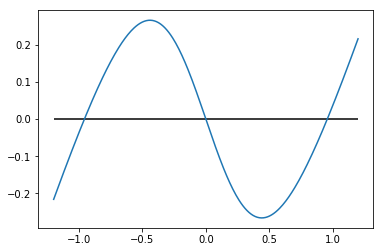

In [9]:
def f(x): 
    return x-numpy.tanh(2*x)

def df(x): 
    return 1.0-2.0/numpy.cosh(2*x)**2

xmin, xmax = -1.2, 1.2
xs = numpy.linspace(xmin, xmax, 300)
plt.plot(xs, f(xs))
plt.hlines(0, xmin, xmax);

This cell will produce the plot to show the convergence of the different method. There is nothing to do beyond evaluating it.

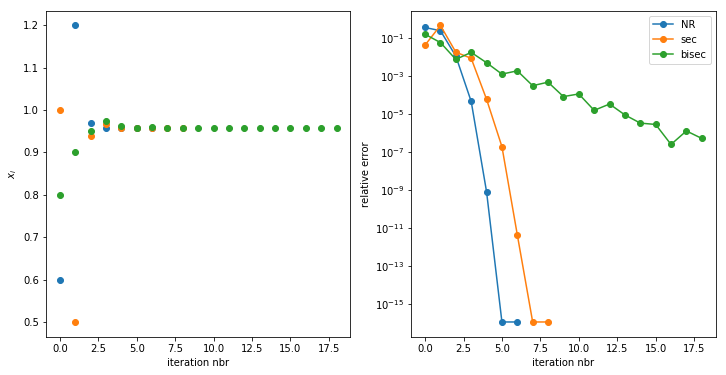

In [10]:
plt.figure(figsize=(12,6))
    
target = 0.9575040240772687

val_plot = plt.subplot(121)
err_plot = plt.subplot(122)

def makePlot(xs,label):
    ns=range(len(xs))    
    val_plot.plot(ns, xs,'o')
    reldiff = abs((numpy.array(xs) - target)/target)
    err_plot.plot(ns, reldiff, 'o-', label=label)
    
    
xs = NewtonRaphson(f, df, 0.6, 1e-13)
makePlot(xs, 'NR')
xs = secant(f, 1.0, 0.5, 1e-13)
makePlot(xs, 'sec')
xs = bisect(f, 1.0, 0.6, 1e-6)
makePlot(xs, 'bisec')

val_plot.set_xlabel('iteration nbr')
val_plot.set_ylabel('$x_i$')
err_plot.set_yscale('log')
err_plot.legend()
err_plot.set_xlabel('iteration nbr')
err_plot.set_ylabel('relative error');

Now that we have a function to find zeros numerically we can return to the generation of the numbers according to a given distribution function. We consider the function 

$$ f(x) = \mathcal{N}\left(1 + \frac{2}{1 + x^2} + \sin(\sqrt{3 x})^2\right)$$

with $\mathcal{N}$ such that $f$ is a probability distribution. The function can be integrated to give its primitive:

$$ g(x) = \mathcal{N}\left(\frac{3 x}{2} + 2 \arctan{x} - \frac{1}{12} \cos(2 \sqrt{3x}) - \frac{
 \sqrt{x} \sin(2 \sqrt{3x})}{2 \sqrt{3}}\right) $$

In [11]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def pdf(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

def cumulative(x):
    return  ((3*x)/2.0 + 2*numpy.arctan(x) - numpy.cos(2*numpy.sqrt(3.0*x))/12. - (numpy.sqrt(x)*numpy.sin(2*numpy.sqrt(3*x)))/(2.*numpy.sqrt(3)))/norm

`cumulative` is the cumulative function, we can see that it continously raises from $0$ to $1$ over the range of $x$.

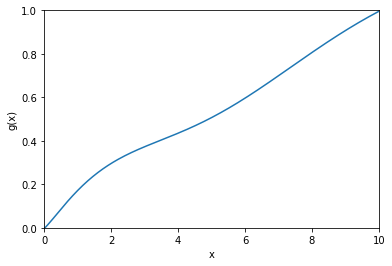

In [12]:
xs = numpy.linspace(0, 10, 200)
cs = cumulative(xs)
plt.plot(xs, cs);
plt.xlabel('x')
plt.ylabel('g(x)')
plt.xlim(0,10)
plt.ylim(0,1);

Implement a function that returns values distributed according to $f(x)$ given a set of values `xis`  uniformly distribued between $0$ and $1$.

In [16]:
def generate(xis):
    sample = []
    # YOUR CODE HERE
    for i in range(0, len(xis)):
        def new_function(x):
            return cumulative(x) - xis[i]
        sample.append(NewtonRaphson(new_function, pdf, 0, 1e-7)[-1])
    return sample
        
    
    

In [14]:
# this test is worth 3 marks 
numpy.random.seed(121)
xis = numpy.random.random(10)
xs = generate(xis)
assert numpy.isclose(xs,[0.6447290358126014,
 1.2679755837324682,
 1.4344898161329276,
 0.8808470745306622,
 8.230334550407566,
 3.568164451968253,
 5.573493283560765,
 7.4323588091800366,
 1.559971073227514,
 9.678063224862273]).all()

[0.6447290358126014, 1.267975583732468, 1.4344898161329274, 0.8808470745306624, 8.230334550407566, 3.5681644519682534, 5.573493283560765, 7.432358809180036, 1.5599710732275136, 9.678063224862274]


This will plot the distribution of your generated values.

[0.5823491693413126, 8.407724008199082, 7.11042367512982, 4.355111316437801, 1.666094401635164, 2.3442050050069083, 5.678541201017665, 8.32971621892472, 0.06296659016377028, 4.661882355958265, 6.182188388227099, 4.801109822559392, 4.269080418783307, 1.707938649291567, 8.000363322510625, 0.782053034900926, 0.48538790086308387, 9.918481310892277, 0.5436212567709383, 6.778781186547426, 3.4163404534280075, 0.8572274664617785, 9.854725496466784, 4.1927056333392105, 0.567972289251653, 3.4575658048875724, 9.742146699090014, 9.052824113382941, 7.221467603856056, 4.392319867526612, 0.16960048007748302, 2.3548906822820985, 6.28244409483072, 0.7397612620555151, 0.4089351296893428, 5.232867795238602, 0.41301292066127515, 5.5368945283544955, 1.682287208378389, 8.717968743120098, 5.828715552707341, 0.5046382945470749, 4.523991208681366, 4.637376631193253, 0.7573825388648198, 4.967464654756171, 6.1159179889575155, 0.05402145062233178, 8.25947727772685, 2.461670030485638, 4.0614093809755865, 5.4302588

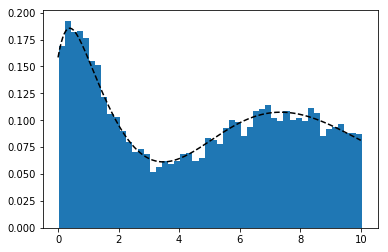

In [15]:
numpy.random.seed(121314)
xis = numpy.random.random(10000)

xs = generate(xis)
plt.hist(xs, bins=50, density=True);

xs = numpy.linspace(0, 10, 200)
fs = pdf(xs)
plt.plot(xs, fs, 'k--');